# Análise dos Crimes no Estado de São Paulo



## Abaixo faço a Análise inicial do boletim de ocorrência dos últimos 10 anos do estado de São Paulo 

* Verificação de informação das colunas;
* Verificação da qualidade dos Dados;
* Primeiros insights;

### Abaixo começo do último ano corrido, 2016

In [51]:

import pandas as pd

In [52]:
#carregando os dados de 2016
import pandas as pd
df = pd.read_csv('https://query.data.world/s/1ae7h2l9lvb1vapjwv9p1oga5', encoding = 'latin1')

/home/anderson/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
df.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
0,3784,2016,10101,DECAP,DEL.SEC.1Âº CENTRO,01Âº D.P. SE,DECAP,DEL.SEC.1Âº CENTRO,78Âº D.P. JARDINS,2016,...,Furto (art. 155),NaN,TRANSEUNTE,-23.564984,-46.652035,S.PAULO,AVENIDA PAULISTA,1000,C,NaN
1,3426,2016,10102,DECAP,DEL.SEC.1Âº CENTRO,02Âº D.P. BOM RETIRO,DECAP,DEL.SEC.1Âº CENTRO,03Âº D.P. CAMPOS ELISEOS,2016,...,Roubo (art. 157),NaN,TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAÃA DA REPUBLICA,0,C,NaN
2,6359,2016,10102,DECAP,DEL.SEC.1Âº CENTRO,02Âº D.P. BOM RETIRO,DECAP,DEL.SEC.1Âº CENTRO,03Âº D.P. CAMPOS ELISEOS,2016,...,Drogas sem autorizaÃ§Ã£o ou em desacordo (Art....,NaN,NaN,-23.542183,-46.640599,S.PAULO,RUA CONSELHEIRO NEBIAS,0,C,NaN
3,1267,2016,10103,DECAP,DEL.SEC.1Âº CENTRO,03Âº D.P. CAMPOS ELISEOS,DECAP,DEL.SEC.8Âº SAO MATEUS,49Âº D.P. SAO MATEUS,2016,...,Roubo (art. 157),NaN,CARGA,-23.609275,-46.455087,S.PAULO,RUA MADUREIRA CALHEIROS,15,C,NaN
4,4804,2016,10106,DECAP,DEL.SEC.1Âº CENTRO,06Âº D.P. CAMBUCI,DECAP,DEL.SEC.1Âº CENTRO,06Âº D.P. CAMBUCI,2016,...,LesÃ£o corporal (art. 129),NaN,NaN,-23.573928,-46.620693,S.PAULO,RUA ROBERTSON,625,C,NaN


In [54]:
#Verificando tipo dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774662 entries, 0 to 774661
Data columns (total 22 columns):
NUM_BO                    774662 non-null int64
ANO_BO                    774662 non-null int64
ID_DELEGACIA              774662 non-null int64
NOME_DEPARTAMENTO         774662 non-null object
NOME_SECCIONAL            774662 non-null object
DELEGACIA                 774662 non-null object
NOME_DEPARTAMENTO_CIRC    774662 non-null object
NOME_SECCIONAL_CIRC       774662 non-null object
NOME_DELEGACIA_CIRC       774662 non-null object
ANO                       774662 non-null int64
MES                       774662 non-null int64
FLAG_STATUS               774662 non-null object
RUBRICA                   774662 non-null object
DESDOBRAMENTO             30092 non-null object
CONDUTA                   658523 non-null object
LATITUDE                  731960 non-null float64
LONGITUDE                 731959 non-null float64
CIDADE                    774662 non-null object
LOGRADOURO 

### Verificando a existência de registros duplicados

In [56]:
duplicate = df.duplicated == True
print(duplicate)

False


In [5]:
#Sera que temos boletins inclusive desse ano ? 
df['ANO_BO'].max()


2017

In [6]:
#Verificando variáveis que podem conter tipos de crimes
df['RUBRICA'].head()

0                                     Furto (art. 155)
1                                     Roubo (art. 157)
2    Drogas sem autorizaÃ§Ã£o ou em desacordo (Art....
3                                     Roubo (art. 157)
4                           LesÃ£o corporal (art. 129)
Name: RUBRICA, dtype: object

In [7]:
#Excelente, vamos quer quantos tipos de crimes diferentes temos aqui registrados :
df['RUBRICA'].nunique()

39

In [8]:
#E agora vamos ver quais são
df['RUBRICA'].unique()

array(['Furto (art. 155)', 'Roubo (art. 157)',
       'Drogas sem autorizaÃ§Ã£o ou em desacordo (Art.33, caput)',
       'LesÃ£o corporal (art. 129)', 'Furto qualificado (art. 155, Â§4o.)',
       'LesÃ£o corporal culposa na direÃ§Ã£o de veÃ\xadculo automotor (Art. 303)',
       'LesÃ£o corporal (art 129 Â§ 9Âº)',
       'A.I.-LesÃ£o corporal (art. 129)', 'A.I.-Roubo (art. 157)',
       'A.I.-Furto (art. 155)',
       'A.I.-Drogas sem autorizaÃ§Ã£o ou em desacordo (Art.33, caput)',
       'A.I.-Porte de entorpecente (Art. 16)',
       'Estupro de vulneravel (art.217-A)',
       'LesÃ£o corporal culposa (art. 129. Â§6o.)',
       'HomicÃ\xaddio qualificado (art. 121, Â§2o.)',
       'HomicÃ\xaddio simples (art. 121)',
       'A.I.-Estupro de vulneravel (art.217-A)',
       'HomicÃ\xaddio culposo na direÃ§Ã£o de veÃ\xadculo automotor (Art. 302)',
       'A.I.-Furto qualificado (art. 155, Â§4o.)', 'Estupro (art.213)',
       'Oferecer droga a pessoa de seu relacionamento (Art.33,Â§3Âº)',


### Sempre tive interesse em investigar todos os crimes diretamente ligados ao tráfico de drogas. Acima posso ver quais são esses. 

In [9]:
artigo_12 = df[df['RUBRICA']== 'A.I.-TrÃ¡fico de entorpecente (Art. 12)'] 

In [10]:
artigo_12.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
44266,4598,2016,20210,DECAP,DEL.SEC.5Âº LESTE,10Âº D.P. PENHA DE FRANCA,DECAP,DEL.SEC.7Âº ITAQUERA,62Âº D.P. ERMELINO MATARAZZO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.494700,-46.491298,S.PAULO,RUA ANISIO DE ABREU,400,C,NaN
44339,921,2016,30203,DEMACRO,DEL.SEC.FRANCO DA ROCHA,DEL.POL.FRANCISCO MORATO,DEMACRO,DEL.SEC.FRANCO DA ROCHA,DEL.POL.FRANCISCO MORATO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.286403,-46.754999,FRANCISCO MORATO,RUA MARTIN AFONSO DE SOUZA,148,C,NaN
67308,229,2016,10349,DECAP,DEL.SEC.6Âº SANTO AMARO,85Âº D.P. JARDIM MIRNA,DECAP,DEL.SEC.6Âº SANTO AMARO,85Âº D.P. JARDIM MIRNA,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.764290,-46.695895,S.PAULO,AVENIDA CARLOS ALBERTO BASTOS MACHADO,80,C,NaN
90087,1246,2016,30138,DEMACRO,DEL.SEC.S.BERNARDO DO CAMPO,08Âº D.P. S.BERNARDO DO CAMPO,DEMACRO,DEL.SEC.S.BERNARDO DO CAMPO,08Âº D.P. S.BERNARDO DO CAMPO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.721820,-46.585610,S.BERNARDO DO CAMPO,RUA PEDROSO HORTA,235,C,NaN
100313,1063,2016,10330,DECAP,DEL.SEC.2Âº SUL,27Âº D.P. IBIRAPUERA,DECAP,DEL.SEC.2Âº SUL,36Âº D.P. VILA MARIANA,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.577935,-46.645655,S.PAULO,AVENIDA PEDRO ALVARES CABRAL,0,C,NaN


In [11]:
#Vendo as características do novo dataframe
artigo_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 44266 to 772279
Data columns (total 22 columns):
NUM_BO                    37 non-null int64
ANO_BO                    37 non-null int64
ID_DELEGACIA              37 non-null int64
NOME_DEPARTAMENTO         37 non-null object
NOME_SECCIONAL            37 non-null object
DELEGACIA                 37 non-null object
NOME_DEPARTAMENTO_CIRC    37 non-null object
NOME_SECCIONAL_CIRC       37 non-null object
NOME_DELEGACIA_CIRC       37 non-null object
ANO                       37 non-null int64
MES                       37 non-null int64
FLAG_STATUS               37 non-null object
RUBRICA                   37 non-null object
DESDOBRAMENTO             0 non-null object
CONDUTA                   0 non-null object
LATITUDE                  28 non-null float64
LONGITUDE                 28 non-null float64
CIDADE                    37 non-null object
LOGRADOURO                37 non-null object
NUMERO_LOGRADOURO         37 non-null o

In [12]:
artigo_12['DESDOBRAMENTO'].nunique()

0

In [13]:
artigo_12

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
44266,4598,2016,20210,DECAP,DEL.SEC.5Âº LESTE,10Âº D.P. PENHA DE FRANCA,DECAP,DEL.SEC.7Âº ITAQUERA,62Âº D.P. ERMELINO MATARAZZO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.494700,-46.491298,S.PAULO,RUA ANISIO DE ABREU,400,C,NaN
44339,921,2016,30203,DEMACRO,DEL.SEC.FRANCO DA ROCHA,DEL.POL.FRANCISCO MORATO,DEMACRO,DEL.SEC.FRANCO DA ROCHA,DEL.POL.FRANCISCO MORATO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.286403,-46.754999,FRANCISCO MORATO,RUA MARTIN AFONSO DE SOUZA,148,C,NaN
67308,229,2016,10349,DECAP,DEL.SEC.6Âº SANTO AMARO,85Âº D.P. JARDIM MIRNA,DECAP,DEL.SEC.6Âº SANTO AMARO,85Âº D.P. JARDIM MIRNA,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.764290,-46.695895,S.PAULO,AVENIDA CARLOS ALBERTO BASTOS MACHADO,80,C,NaN
90087,1246,2016,30138,DEMACRO,DEL.SEC.S.BERNARDO DO CAMPO,08Âº D.P. S.BERNARDO DO CAMPO,DEMACRO,DEL.SEC.S.BERNARDO DO CAMPO,08Âº D.P. S.BERNARDO DO CAMPO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.721820,-46.585610,S.BERNARDO DO CAMPO,RUA PEDROSO HORTA,235,C,NaN
100313,1063,2016,10330,DECAP,DEL.SEC.2Âº SUL,27Âº D.P. IBIRAPUERA,DECAP,DEL.SEC.2Âº SUL,36Âº D.P. VILA MARIANA,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.577935,-46.645655,S.PAULO,AVENIDA PEDRO ALVARES CABRAL,0,C,NaN
102693,31,2016,500080,DECAP,DEL.SEC.8Âº SAO MATEUS,DEL.SEC.8Âª SÃO MATEUS,DECAP,DEL.SEC.8Âº SAO MATEUS,69Âº D.P. TEOTONIO VILELA,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.591025,-46.494142,S.PAULO,RUA VITOTOMA MASTROROSA,151,C,NaN
111207,4528,2016,10330,DECAP,DEL.SEC.2Âº SUL,27Âº D.P. IBIRAPUERA,DECAP,DEL.SEC.2Âº SUL,27Âº D.P. IBIRAPUERA,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,-23.622215,-46.678500,S.PAULO,AVENIDA JORNALISTA ROBERTO MARINHO,2500,C,NaN
117256,56,2016,30121,DEMACRO,DEL.SEC.S.BERNARDO DO CAMPO,05Âº D.P. S.BERNARDO DO CAMPO,DEMACRO,DEL.SEC.S.BERNARDO DO CAMPO,03Âº D.P. S.BERNARDO DO CAMPO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,NaN,NaN,S.BERNARDO DO CAMPO,RUA VITOR BRECHERET,0,C,NaN
130728,118,2016,30321,DEMACRO,DEL.SEC.MOGI DAS CRUZES,02Âº D.P. SUZANO,DEMACRO,DEL.SEC.MOGI DAS CRUZES,02Âº D.P. SUZANO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,NaN,NaN,SUZANO,RUA VINTE E SEIS,0,C,NaN
155541,1078,2016,30203,DEMACRO,DEL.SEC.FRANCO DA ROCHA,DEL.POL.FRANCISCO MORATO,DEMACRO,DEL.SEC.FRANCO DA ROCHA,DEL.POL.FRANCISCO MORATO,2016,...,A.I.-TrÃ¡fico de entorpecente (Art. 12),NaN,NaN,NaN,NaN,FRANCISCO MORATO,RUA SANTA FÃ,575,C,NaN


In [14]:
artigo_12['ANO_BO'].max()

2016

In [15]:
artigo_12['ANO_BO'].min()

2016

In [16]:
df.sort(columns='ANO_BO', axis=0, ascending=True)

/home/anderson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
0,3784,2016,10101,DECAP,DEL.SEC.1Âº CENTRO,01Âº D.P. SE,DECAP,DEL.SEC.1Âº CENTRO,78Âº D.P. JARDINS,2016,...,Furto (art. 155),NaN,TRANSEUNTE,-23.564984,-46.652035,S.PAULO,AVENIDA PAULISTA,1000,C,NaN
515167,2970,2016,30412,DEMACRO,DEL.SEC.OSASCO,02Âº D.P. OSASCO,DEMACRO,DEL.SEC.OSASCO,02Âº D.P. OSASCO,2016,...,Roubo (art. 157),NaN,TRANSEUNTE,-23.568443,-46.792243,OSASCO,RUA DA ASSOCIAÃÃO,0,C,NaN
515168,1748,2016,30403,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.COTIA,DEMACRO,DEL.SEC.CARAPICUIBA,02Âº D.P. COTIA,2016,...,Roubo (art. 157),NaN,VEICULO,-23.593489,-46.832289,COTIA,RUA ADIBE AUADA,0,C,NaN
515169,3647,2016,30427,DEMACRO,DEL.SEC.CARAPICUIBA,01Âº D.P. CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,03Âº D.P. CARAPICUIBA,2016,...,LesÃ£o corporal (art. 129),NaN,NaN,-23.541278,-46.833409,CARAPICUIBA,RUA SÃO MAC,148,C,NaN
515170,83582,2016,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.2Âº SUL,27Âº D.P. IBIRAPUERA,2016,...,Furto (art. 155),NaN,INTERIOR TRANSPORTE COLETIVO,-23.615203,-46.673062,S.PAULO,AVENIDA VEREADOR JOSE DINIZ,0,C,NaN
515171,625,2016,30616,DEMACRO,DEL.SEC.TABOÃO DA SERRA,02Âº D.P. TABOÃO DA SERRA,DEMACRO,DEL.SEC.TABOÃO DA SERRA,02Âº D.P. TABOÃO DA SERRA,2016,...,Roubo (art. 157),NaN,TRANSEUNTE,-23.640572,-46.806273,TABOAO DA SERRA,AVENIDA IBIRAMA,1580,C,NaN
515172,1159064,2016,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.3Âº OESTE,07Âº D.P. LAPA,2016,...,Furto (art. 155),NaN,TRANSEUNTE,-23.520141,-46.704119,S.PAULO,RUA DOZE DE OUTUBRO,192,C,NaN
515173,7546,2016,30407,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.ITAPEVI,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.ITAPEVI,2016,...,Roubo (art. 157),NaN,ESTABELECIMENTO COMERCIAL,-23.546986,-46.924505,ITAPEVI,RUA EULÃLIA,270,C,NaN
515174,3828,2016,30212,DEMACRO,DEL.SEC.GUARULHOS,04Âº D.P. GUARULHOS,DEMACRO,DEL.SEC.GUARULHOS,08Âº D.P. GUARULHOS,2016,...,Roubo (art. 157),NaN,VEICULO,-23.467574,-46.473933,GUARULHOS,RUA SANTANA DE IPANEMA,68,C,NaN
515175,695,2016,30307,DEMACRO,DEL.SEC.MOGI DAS CRUZES,02Âº D.P. MOGI DAS CRUZES,DEMACRO,DEL.SEC.MOGI DAS CRUZES,02Âº D.P. MOGI DAS CRUZES,2016,...,Furto (art. 155),NaN,OUTROS,-23.546948,-46.222278,MOGI DAS CRUZES,AVENIDA ALEXANDRINA,334,C,NaN


### Distribuição dos crimes de acordo com o mês

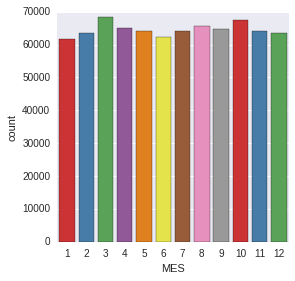

In [17]:


import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.factorplot('MES', data= df,palette='Set1', kind='count')


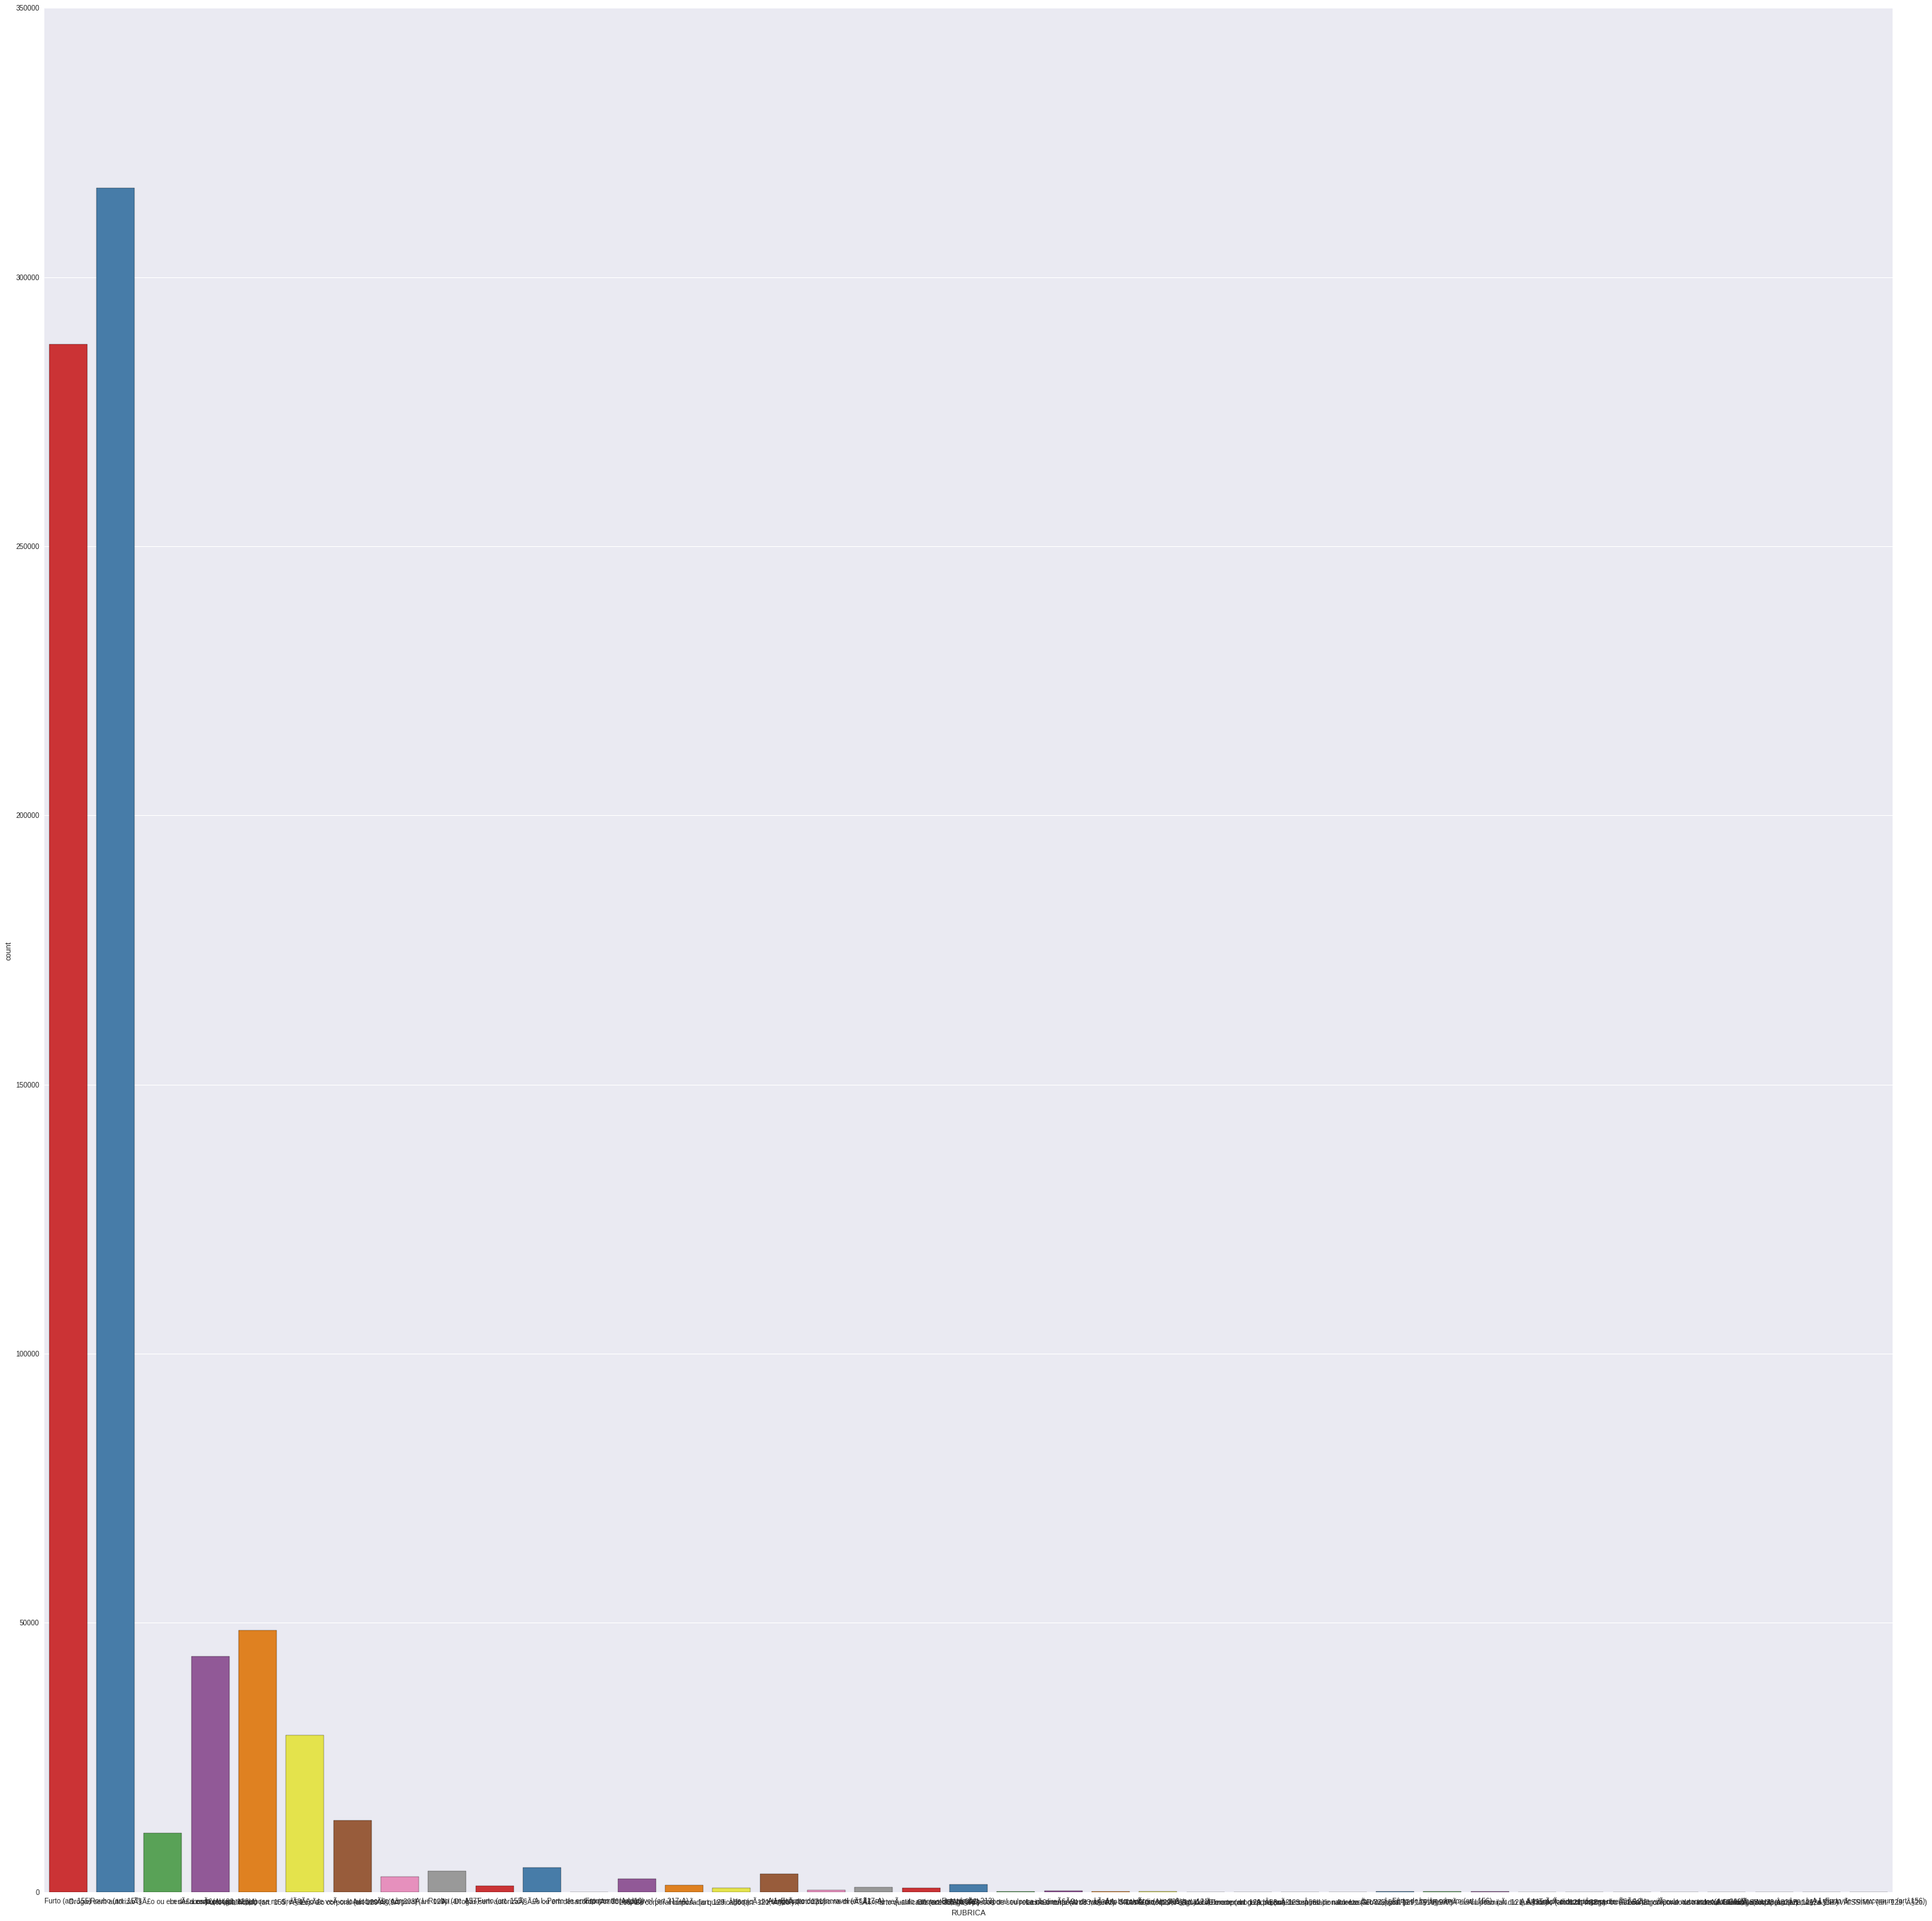

In [18]:
sns.factorplot('RUBRICA', data= df,palette='Set1', kind='count' , size = 38)


In [19]:
# Como esperado, abaixo vemos que roubo é o crime mais comum

df['RUBRICA'].describe()

count               774662
unique                  39
top       Roubo (art. 157)
freq                316548
Name: RUBRICA, dtype: object

### Carregando o ano de 2015 pra comparações

In [20]:
df2 = pd.read_csv('https://query.data.world/s/53c41jmuz5tf9cqtphr243t7a')

/home/anderson/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,5695,2015,10101,DECAP,DEL.SEC.1� CENTRO,01� D.P. SE,DECAP,DEL.SEC.1� CENTRO,01� D.P. SE,2015,...,TRANSEUNTE,-23.540788,-46.629665,S.PAULO,RUA DA CANTAREIRA,400,C,NaN,NaN,NaN
1,12365,2015,10211,DECAP,DEL.SEC.6� SANTO AMARO,11� D.P. SANTO AMARO,DECAP,DEL.SEC.6� SANTO AMARO,99� D.P. CAMPO GRANDE,2015,...,VEICULO,-23.674905,-46.679477,S.PAULO,RUA JOAO CARLOS DE ARTUR,294,C,NaN,NaN,NaN
2,6115,2015,10216,DECAP,DEL.SEC.2� SUL,16� D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2� SUL,17� D.P. DOUTOR ALDO GALIANO,2015,...,TRANSEUNTE,-23.587069,-46.607384,S.PAULO,RUA BOM PASTOR,1200,C,NaN,NaN,NaN
3,1823,2015,10308,DECAP,DEL.SEC.5� LESTE,52� D.P. PARQUE S.JORGE,DECAP,DEL.SEC.5� LESTE,52� D.P. PARQUE S.JORGE,2015,...,NaN,-23.534230,-46.567711,S.PAULO,RUA JOSE TAVARES DE SIQUEIRA,0,C,NaN,NaN,NaN
4,370,2015,10309,DECAP,DEL.SEC.8� SAO MATEUS,55� D.P. PARQUE S.RAFAEL,DECAP,DEL.SEC.8� SAO MATEUS,55� D.P. PARQUE S.RAFAEL,2015,...,ESTABELECIMENTO COMERCIAL,NaN,NaN,S.PAULO,AVENIDA SAPOPEMBA,20020,C,NaN,NaN,NaN


###  Houve aumento dos roubos em 2016 ? Quanto ? 

In [22]:
df2['RUBRICA'].describe()

count               780982
unique                  37
top       Roubo (art. 157)
freq                315519
Name: RUBRICA, dtype: object

In [23]:
print("Houve",(316548-315519), "roubos a mais no estado de São Paulo em 2016 do que 2015","um aumento de",(1029/315519)*100,"%")

Houve 1029 roubos a mais no estado de São Paulo em 2016 do que 2015 um aumento de 0.32612932977094883 %


### Que tal checar o aumento ou diminuição de outros crimes ? Vou olhar para o estupro de Vulneráveis - art.217 abaixo

In [24]:
estupro_2016 =  df[df['RUBRICA'] == 'A.I.-Estupro de vulneravel (art.217-A)']

In [25]:
estupro_2016.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
917,12335,2016,20249,DECAP,DEL.SEC.8Âº SAO MATEUS,49Âº D.P. SAO MATEUS,DECAP,DEL.SEC.8Âº SAO MATEUS,49Âº D.P. SAO MATEUS,2016,...,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,-23.597891,-46.479996,S.PAULO,RUA VITALIANO ROTELLINI,65,C,NaN
6119,8506,2016,30427,DEMACRO,DEL.SEC.CARAPICUIBA,01Âº D.P. CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01Âº D.P. CARAPICUIBA,2016,...,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,-23.532068,-46.860835,CARAPICUIBA,RUA DOS PESCADORES,27,C,NaN
6944,3713,2016,10342,DECAP,DEL.SEC.1Âº CENTRO,78Âº D.P. JARDINS,DECAP,DEL.SEC.7Âº ITAQUERA,68Âº D.P. LAGEADO,2016,...,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,-23.543588,-46.399717,S.PAULO,RUA MANUEL DA MOTA COUTINHO,293,C,NaN
8722,5596,2016,10216,DECAP,DEL.SEC.2Âº SUL,16Âº D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2Âº SUL,35Âº D.P. JABAQUARA,2016,...,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,-23.643510,-46.657066,S.PAULO,RUA EUSTAQUIO DA COSTA,30,C,NaN
9665,398,2016,280208,DEMACRO,DEL.SEC.SANTO ANDRÃ,DEL.DEF.MUL. MAUA,DEMACRO,DEL.SEC.SANTO ANDRÃ,03Âº D.P. MAUA,2016,...,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,NaN,NaN,MAUA,RUA JOAO CESARIO SIMÃO,120,C,NaN


In [26]:
estupro_2015 =  df2[df2['RUBRICA'] == 'A.I.-Estupro de vulneravel (art.217-A)']

In [27]:
estupro_2015.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21,Unnamed: 22,Unnamed: 23
322,2073,2015,30201,DEMACRO,DEL.SEC.GUARULHOS,DEL.POL.ARUJA,DEMACRO,DEL.SEC.GUARULHOS,DEL.POL.ARUJA,2015,...,NaN,-23.380597,-46.323957,ARUJA,RUA QUARENTA E DOIS,467,C,NaN,NaN,NaN
915,5780,2015,30217,DEMACRO,DEL.SEC.GUARULHOS,07� D.P. GUARULHOS,DEMACRO,DEL.SEC.GUARULHOS,07� D.P. GUARULHOS,2015,...,NaN,-23.368883,-46.396778,GUARULHOS,RUA ACASSIO ANTONIO BATISTA,1546,C,NaN,NaN,NaN
1558,6185,2016,30212,DEMACRO,DEL.SEC.GUARULHOS,04� D.P. GUARULHOS,DEMACRO,DEL.SEC.GUARULHOS,04� D.P. GUARULHOS,2015,...,NaN,-23.461593,-46.427792,GUARULHOS,RUA P�RTO CALVO,315,C,NaN,NaN,NaN
13150,2028,2015,10326,DECAP,DEL.SEC.7� ITAQUERA,63� D.P. VILA JACUI,DECAP,DEL.SEC.8� SAO MATEUS,66� D.P. JDIM ARICANDUVA,2015,...,NaN,-23.553106,-46.493105,S.PAULO,AVENIDA ITAQUERA,7486,C,NaN,NaN,NaN
19220,1657,2015,280206,DEMACRO,DEL.SEC.SANTO ANDR�,04� D.P. MAUA,DEMACRO,DEL.SEC.SANTO ANDR�,02� D.P. SANTO ANDR�,2015,...,NaN,-23.650617,-46.507149,S.ANDRE,RUA ITAPEMIRIM,254,C,NaN,NaN,NaN


In [28]:
estupro_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 322 to 777028
Data columns (total 24 columns):
NUM_BO                    367 non-null int64
ANO_BO                    367 non-null int64
ID_DELEGACIA              367 non-null int64
NOME_DEPARTAMENTO         367 non-null object
NOME_SECCIONAL            367 non-null object
DELEGACIA                 367 non-null object
NOME_DEPARTAMENTO_CIRC    367 non-null object
NOME_SECCIONAL_CIRC       367 non-null object
NOME_DELEGACIA_CIRC       367 non-null object
ANO                       367 non-null int64
MES                       367 non-null int64
FLAG_STATUS               367 non-null object
RUBRICA                   367 non-null object
DESDOBRAMENTO             6 non-null object
CONDUTA                   0 non-null object
LATITUDE                  297 non-null float64
LONGITUDE                 297 non-null float64
CIDADE                    367 non-null object
LOGRADOURO                367 non-null object
NUMERO_LOGRADOURO      

In [29]:
estupro_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 917 to 774584
Data columns (total 22 columns):
NUM_BO                    374 non-null int64
ANO_BO                    374 non-null int64
ID_DELEGACIA              374 non-null int64
NOME_DEPARTAMENTO         374 non-null object
NOME_SECCIONAL            374 non-null object
DELEGACIA                 374 non-null object
NOME_DEPARTAMENTO_CIRC    374 non-null object
NOME_SECCIONAL_CIRC       374 non-null object
NOME_DELEGACIA_CIRC       374 non-null object
ANO                       374 non-null int64
MES                       374 non-null int64
FLAG_STATUS               374 non-null object
RUBRICA                   374 non-null object
DESDOBRAMENTO             3 non-null object
CONDUTA                   0 non-null object
LATITUDE                  306 non-null float64
LONGITUDE                 306 non-null float64
CIDADE                    374 non-null object
LOGRADOURO                374 non-null object
NUMERO_LOGRADOURO      

In [30]:
print(((374/367)-1)*100,"%")

1.9073569482288777 %


### Acima vemos que os estupros também aumentaram  no estado de São Paulo, de  367 em 2015 para 374 em 2016 , um aumento de 1.90%

### Po ocorrer curiosidade, vou verificar se há algum mês mais propicio para ocorrer estupros. Mas aqui vou juntar os dados de 2015 e 2016 (e depois , claro, em outros arquivos, farei a concatenação dos dados dos últimos anos nesse crime, bem como no de outros crimes 



In [32]:
estupros_2015_2016 = [estupro_2015, estupro_2016]
estupros_2015_2016 = pd.concat(estupros_2015_2016)
estupros_2015_2016.head()

,ANO,ANO_BO,CIDADE,CONDUTA,DELEGACIA,DESDOBRAMENTO,FLAG_STATUS,FLAG_STATUS.1,ID_DELEGACIA,LATITUDE,...,NOME_DEPARTAMENTO,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL,NOME_SECCIONAL_CIRC,NUMERO_LOGRADOURO,NUM_BO,RUBRICA,Unnamed: 21,Unnamed: 22,Unnamed: 23
322,2015,2015,ARUJA,NaN,DEL.POL.ARUJA,NaN,C,C,30201,-23.380597,...,DEMACRO,DEMACRO,DEL.SEC.GUARULHOS,DEL.SEC.GUARULHOS,467,2073,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,NaN
915,2015,2015,GUARULHOS,NaN,07� D.P. GUARULHOS,NaN,C,C,30217,-23.368883,...,DEMACRO,DEMACRO,DEL.SEC.GUARULHOS,DEL.SEC.GUARULHOS,1546,5780,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,NaN
1558,2015,2016,GUARULHOS,NaN,04� D.P. GUARULHOS,NaN,C,C,30212,-23.461593,...,DEMACRO,DEMACRO,DEL.SEC.GUARULHOS,DEL.SEC.GUARULHOS,315,6185,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,NaN
13150,2015,2015,S.PAULO,NaN,63� D.P. VILA JACUI,NaN,C,C,10326,-23.553106,...,DECAP,DECAP,DEL.SEC.7� ITAQUERA,DEL.SEC.8� SAO MATEUS,7486,2028,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,NaN
19220,2015,2015,S.ANDRE,NaN,04� D.P. MAUA,NaN,C,C,280206,-23.650617,...,DEMACRO,DEMACRO,DEL.SEC.SANTO ANDR�,DEL.SEC.SANTO ANDR�,254,1657,A.I.-Estupro de vulneravel (art.217-A),NaN,NaN,NaN


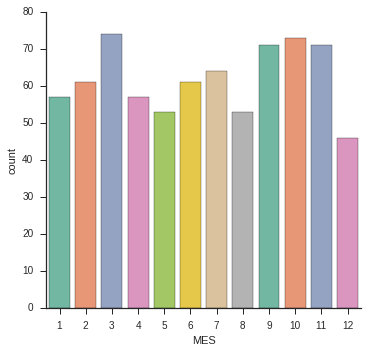

In [47]:
% matplotlib inline


sns.factorplot('MES', data= estupros_2015_2016,palette='Set2', kind='count', size = 5)


## Nos últimos 2 anos ,a maioria dos estupros ocorreu no mês de maio. Em contrapartida, Dezembro é o mês de menor ocorrência

### Nos próximas células irei investigar quais cidades tem as maiores taxas de estupro  a cada 100 mil habitantes .  Por enquanto, abaixo só contei os casos por cidade, então óbvio que São Paulo por ser mais populosa sempre terá mais. Entretante, não é a que tem a maior taxa de estupro. 

In [50]:
estupros_2015_2016['CIDADE'].value_counts()

S.PAULO                                     333
GUARULHOS                                    58
S.BERNARDO DO CAMPO                          26
OSASCO                                       25
S.ANDRE                                      23
BARUERI                                      22
CARAPICUIBA                                  21
COTIA                                        18
ITAPEVI                                      16
EMBU                                         16
ITAQUAQUECETUBA                              15
MOGI DAS CRUZES                              14
MAUA                                         13
SANTANA DE PARNAIBA                          12
FRANCO DA ROCHA                              12
TABOAO DA SERRA                              11
DIADEMA                                      11
SUZANO                                       10
ARUJA                                        10
FRANCISCO MORATO                             10
JANDIRA                                 